In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from igraph import *

In [218]:
df_links = pd.read_csv('../data/gridkit_europe-highvoltage-links.csv')
df_vertices = pd.read_csv('../data/gridkit_europe-highvoltage-vertices.csv')

In [219]:
g = Graph([(row['v_id_1'], row['v_id_2']) for _, row in df_links.iterrows()])
g.simplify()
g.to_undirected()
to_delete_ids = [v.index for v in g.vs if v.degree() == 0]
g.delete_vertices(to_delete_ids)
# Test
assert (np.array(g.is_multiple()) == True).sum() == 0
assert (np.array(g.has_multiple()) == True).sum() == 0
assert (np.array(g.is_loop()) == True).sum() == 0
g.vcount(), g.ecount()

(13844, 17277)

In [220]:
k = sum(g.degree())/len(g.degree())
k = mean(g.degree())
kk =  mean([g*g for g in g.degree()])
kappa =k / kk
kappa, k, kk
print(f'1. Kaapa: {kappa}, k {k}, kk {kk}')

1. Kaapa: 0.31641698106296584, k 2.4959549263218896, kk 7.888182606183211


In [221]:
def get_component_size(gn):
    g_giant = gn.clusters().giant()
    return g_giant.vcount(), g_giant.vcount() / gn.vcount()

abs_size, rel_size = get_component_size(g)
print(f'2. Absolute size: {abs_size}, relative size {rel_size}')

2. Absolute size: 13478, relative size 0.9735625541750939


In [222]:
f_c = 1. - 1. / (kappa-1)
f_c_err = 1. - 1. / mean(g.degree())
print(f'3. f_c: {f_c}, f_c_err {f_c_err}')

3. f_c: 2.4628801071667805, f_c_err 0.5993517393065954


In [226]:
absolute_sizes = []
relative_sizes = []
f_s = []
for f in np.linspace(0.0, 0.9, 100):
    abs_sizes = []
    rel_sizes = []
    for _  in range(100):
        g_sample = g.copy()
        to_delete_ids = np.random.choice([v.index for v in g_sample.vs], size=int(np.round(f*g_sample.vcount())), replace=False)
        g_sample.delete_vertices(to_delete_ids)
        absolute_size, relative_size = get_component_size(g_sample)
        absolute_sizes.append(absolute_size)
        relative_sizes.append(relative_size)
        f_s.append(f)
df_f = pd.DataFrame({'f': f_s, 'Absolute size': absolute_sizes, 'Relative size': relative_sizes})

##### 4. Absolute and relative size versus f

<AxesSubplot:xlabel='f', ylabel='Absolute size'>

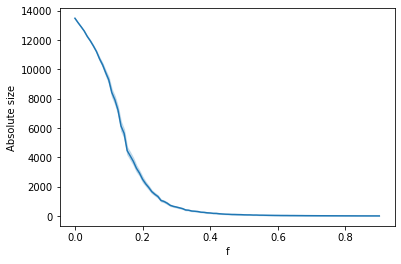

In [227]:
sns.lineplot(data=df_f, x='f', y='Absolute size')

<AxesSubplot:xlabel='f', ylabel='Relative size'>

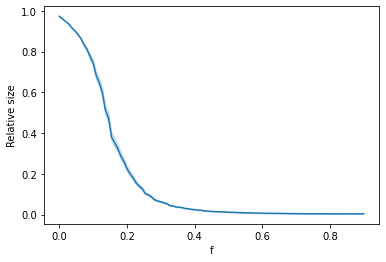

In [228]:
sns.lineplot(data=df_f, x='f', y='Relative size')